# kasra hajiheidari 810199400
Artificial inteligence CA1   
solving curve fitting problem using genetic algorithms


# Part 1: Basic concepts
Each coefficient is considered as a gene 
A chromosome consists of n genes where n is the length degree of polynomial phrase.  
For example in the following polynomial phrase: $$ a_{0} + a_{1}x^{1} + a_{2}x^{2} + ... + a_{n}x^{n} $$ The genes are: a<sub>0</sub> , a<sub>1</sub>, a<sub>2</sub> ,..., a<sub>n</sub> and all of these genes toghether generates a chromosome that is a answer to our problem. <br>
Our input fields are:
- `Degree of polynomial phrase`
- `Range of coefficients`
- `Points in polynomial phrase` <br>

In the following class we store the input:

In [11]:
class Input():
    degree = 5
    range = (-10,9)
    points = [(3,0), (1,0), (-1,0), (2,-15), (-3,0)]

Here we define our consts for following variables:
- `population_size`: The count of all chromosomes which is called the population.
- `max_generations`: The maximum number of generations that the algorithm will explore to find a solution.
- `prob_crossover`: Probability of a crossover happening between two chromosomes.
- `prob_mutate`: Probability of a mutation happening in a chromosome.
- `prob_carry`: The percentage of the best chromosomes that will be carried directly to the next generation.

In [12]:
class Consts():
    prob_crossover = 0.6
    prob_mutate = 0.4
    prob_carry = 0.15
    population_size = 200
    max_generations = 1000


# Part 2: Initial population
In this part we use `initial_population` function to randomly generate and initial the population list. 
This function uses `population_size` of `Consts` class and `range` of `Input` class to randomly generate all of the chromosomes in the population.

In [13]:
import random
consts = Consts()
inputs = Input()
def initial_population(const : Consts, input : Input):
    Population = []
    for i in range (int(const.population_size)):
        temp = []
        for j in range (input.degree):
            rand = random.randint(input.range[0], input.range[1])
            temp.append(rand)
        Population.append(temp)    
    return Population           

# Part 3: Fitness function
We define `distance` for our goal points (for example (x,y)) from chromosomes as bellow: <br>
`distance`  = |y -  f(x)| in which f() is our chromosome (polynomial phrase) and distance value is sum of all distances for all points. <br>

After defining `distance` we define our `Fitnessfunction` as bellow:
$$ Fitnessfunction = \frac{1}{1 + distance^{2}} $$   
The closer the chromosome is to the goalpoints, the higher the fitness will be and we are closer to our final goal.  
The fitness is between 0 and 1. The fitness of 1 means that the chromosome is our solution.
Also `chromo_value` function calculates f(x).




In [14]:
chromosome = []
def chromo_value(x, chromo):
    value = 0
    x_value = 1
    for i in range(len(chromo)):
        value +=  chromo[i]*x_value
        x_value = x_value * x
    return value

def fitnessfunc(input : Input, chromo):
    distance = 0.0
    for point in input.points:
        point_x = point[0]
        point_y = point[1]
        distance += abs(point_y - chromo_value(point_x, chromo))
    fitness_value = distance
    return fitness_value


# Part 4: Genetic operations and generating next population
- First of all we use `create_carriedpool` function to sort population by fitnessvalue and select a number of best chromosomes in a generation to carry to next generation.

- Then we use `create_matingpool` function to generate a new population to perfom genetic algorithms on them(crossover and mutation).Size of these pool is same as our main population.Each member is chosen by a fortune wheel where the better chromosomes have a higher chance of winning. 
``
- In the next step we use `create_crossoverpool` function to generate a modified population in which some pairs of chromosomes with propability of `prob_crossover` will be crossed over.(can be 1-point or n-point cross over)

- In the end we use `create_mutatepool` function to modify the population created by `create_crossover` function.Some chromosomes, with the chance of `prob_mutate`, have had a single gene of them mutated to a random number to help the diversity of our population.We concat this pool and carriedpool to generate our next generation population.

In [15]:
import copy
def create_carriedpool(consts : Consts, fitnesses : list[float] ,Population : list[chromosome]):
    carrycount = int(len(Population)*consts.prob_carry)
    caried_pool = Population[:carrycount]
    return copy.deepcopy(caried_pool)

def create_matingpool(Population : list[chromosome],fitnesses : list[float]):
    total_fitness = sum(fitnesses)
    probs = [f / total_fitness for f in fitnesses]
    cumulative_distribution = [sum(probs[:i + 1]) for i in range(len(probs))]
    mating_pool = []
    for _ in Population:
        random_value = random.random() 
        for i, prob in enumerate(cumulative_distribution):
            if random_value <= prob:
                mating_pool.append(copy.deepcopy(Population[i]))
                break
    return copy.deepcopy(mating_pool)

def create_crossoverpool(Population : list[chromosome], prob_crossover, degree):
    crossovernum = len(Population)*prob_crossover
    crossovernum = int(crossovernum / 2)
    crossover_pool = copy.deepcopy(Population)
    for i in range(crossovernum):
        crosindex1 = random.randint(0,len(Population) - 1)
        crosindex2 = random.randint(0,len(Population) - 1)
        cross_point = random.randint(1, len(crossover_pool[i]) -2)
        crossover_pool[crosindex1][:cross_point], crossover_pool[crosindex2][:cross_point] = crossover_pool[crosindex2][:cross_point], crossover_pool[crosindex1][:cross_point]
    return crossover_pool
        
def create_mutatepool(population: list[chromosome], prob_mutate: float, point_range):
    mutatepool = copy.deepcopy(population)
    for j in range(len(mutatepool)):
        for i in range(len(mutatepool[j])):
            if random.random() < prob_mutate:
                mutatepool[j][i] = random.randint(point_range[0], point_range[1]) 
    return mutatepool

# Part 5: Genetic algorithm

`find_p_phrase` function does the process of finding the polynomial phrase.<br>
We use a while loop to generate and modify each generation until we found solution or we reach `max_generations` value.

At first we shuffle population, then we calculate fitnessvalue for every chromosome and check if we find our solution or not. (fitnessvalue = 1)
Then we create carriedpool, matingpool, crossoverpool, and mutatepool. After that we concat carriedpool and mutatepool which means some chromosome in mutatepool is discarded in order to have the same Population size for next generation.

In [16]:
def find_p_phrase(input : Input, consts : Consts):
    generation = 0
    Population = initial_population(consts, input)
    
    while generation < consts.max_generations:
        generation += 1
        fitnesses = []
        maxfitnessvalue = 0.0
        flag = False
        for chromo in Population:
            fitnesses.append(fitnessfunc(input,chromo))    
        combined = list(zip(Population,fitnesses))
        sorted_population = sorted(combined, key=lambda x : x[1])
        new_pop = [pair[0] for pair in sorted_population]
        if sorted_population[0][1] == 0:
            return sorted_population[0][0]
        # print(sorted_population[0][1])
        carriedpool = create_carriedpool(consts, fitnesses, new_pop)
        matingpool = create_matingpool(new_pop, fitnesses)
        crossoverpool = create_crossoverpool(matingpool, consts.prob_crossover, input.degree) 
        mutatepool = create_mutatepool(crossoverpool, consts.prob_mutate, input.range)
        Population = mutatepool[:len(Population) - len(carriedpool)]
        Population.extend(carriedpool)
    return None
        
result = find_p_phrase(inputs, consts)
if result is None:
    print('Could not find phrase.')
else:
    print(*result)
    


9 0 -10 0 1


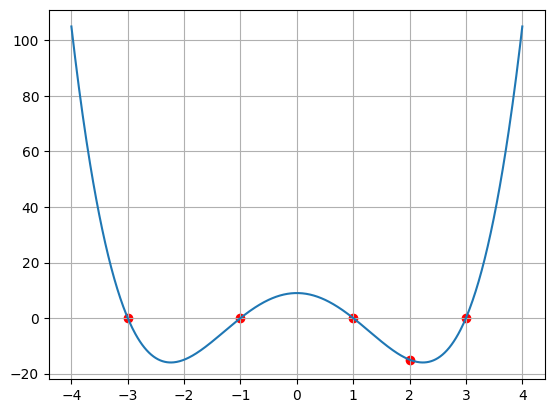

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import inf

points = inputs.points
min_x = float(+inf)
max_x = float(-inf)
for p in points:
    if(p[0] < min_x):
        min_x = p[0]
    if(p[0] > max_x):
        max_x = p[0]
x = np.linspace(min_x - 1, max_x + 1 , abs(min_x - max_x) * 100)

result.reverse()
y = np.polyval(result, x)
plt.plot(x, y)
plt.grid(True)

x0 = [p[0] for p in points]
y0 = [p[1] for p in points]
plt.scatter(x0, y0, color='red')
plt.show()

# Questions:
1. If the population size is too big, the algorithm will take more time and process to converge and in the other hand if the population size is too small, it leads to reduced diversity, resulting in fewer cases being evaluated in each generation. Consequently, the probability of converging to the correct solution within the same number of generations decreases. This situation can be improved by increasing the mutation probability and more diversity and allowing for more generations to be examined.

2. When the population size increases with each generation, it can lead to improved algorithm precision due to increased diversity. However, this also results in increased time and memory consumption at each step, which can become problematic.
As said before the main is to keep the population size same but make it better in every generation and discarding the ones that are not good.

3. Typically, crossover is applied with a considerably higher probability than mutation. This is because crossover aims to create improved chromosomes by combining the attributes of two chromosomes, while mutation serves the purpose of preventing the algorithm from becoming trapped by changing the genes directly. Relying solely on one of these mechanisms would be insufficient, as they each offer distinct effects and contributions to the optimization process."

4. The major thing in solving this kind of problems are parameters and well defining functions as fitnessfunction. Choosing the right amount for each parameter can lead to a better diversity and maybe faster converge.The combination of good selection and diversity can lead to a good algorithm.

5. Because of randomness of mutation we always have new chromosomes on next generations.We can change the implementation and we can increase the probability of mutation and apply it to a larger number of genes within a chromosome. Additionally, running the algorithm multiple times with new random populations can enhance diversity, potentially facilitating better exploration of the solution space in each run

6. We can set an upper limit on the number of generations generated by the algorithm and identify the best solution within all these generations. If the algorithm fails to converge within these limits, we can output the best result found during the process.

7. As the polynomial degree increases, the time required to find the coefficients using genetic algorithms is expected to rise. This is primarily due to the larger number of coefficients to be determined in higher degree polynomials, which expands the search space for the genetic algorithm. A broader search space makes it more challenging and time-intensive for the algorithm to identify the optimal solution. However, the actual impact on the time required for coefficient determination can vary based on the genetic algorithm's implementation details and the problem's complexity.

8. Adding more points significantly increases the computational effort required to calculate fitness values. Additionally, it can reduce the number of potential solutions since the answer must encompass all the added points. As a result, convergence can become a more time-consuming process.
Conversely, reducing the number of points accelerates fitness calculations and expedites the search for solutions